In [79]:
import requests
import zipfile
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler

plt.rcParams['figure.dpi']     = 100
plt.rcParams['figure.figsize'] = 12,8
plt.rcParams['axes.prop_cycle'] = cycler('color', ['cadetblue','orangered','gold', 'navy'])

In [24]:
r = requests.get('https://arcgis.com/sharing/rest/content/items/a8c562ead9c54e13a135b02e0d875ffb/data')
zawartosc = r.content

with open('dane//dane.zip', 'wb') as plik:
    plik.write(zawartosc)


with zipfile.ZipFile('dane//dane.zip') as spaklowany_plik:
    spaklowany_plik.extractall(pathlib.Path('dane/pliki'))

lista_plikow = list(pathlib.Path.glob(pathlib.Path('dane/pliki'), '*.csv'))

kowidowe = []

for plik in lista_plikow:
    kowidowe.append(pd.read_csv(plik,encoding= 'windows-1250', sep = ';'))

wypisujemy nazwy kolumn w pliku z danymi archiwalnymi

In [57]:
arch_data0 = pd.read_csv(pathlib.Path('dane/mat_arch.csv'), sep = ';',decimal=' ', encoding= 'windows-1250')
print(f'{arch_data0.columns=}')
#print(arch_data0['Data'])

arch_data0.columns=Index(['Unnamed: 0', 'Data', 'Nowe przypadki',
       'Wszystkie przypadki kumulatywnie', 'Zgony',
       'Wszystkie zgony kumulatywnie', 'Ozdrowieńcy (dzienna)',
       'Ozdrowieńcy (suma)', 'Aktywne przypadki', 'Kwarantanna', 'Nadzór'],
      dtype='object')


In [56]:
kowidowe[0]
#kowidowe[30]
#kowidowe[65]
#kowidowe[-1]

,wojewodztwo,liczba_przypadkow,liczba_na_10_tys_mieszkancow,zgony,zgony_w_wyniku_covid_bez_chorob_wspolistniejacych,zgony_w_wyniku_covid_i_chorob_wspolistniejacych,liczba_zlecen_poz,liczba_osob_objetych_kwarantanna,liczba_wykonanych_testow,liczba_testow_z_wynikiem_pozytywnym,liczba_testow_z_wynikiem_negatywnym,liczba_pozostalych_testow,teryt,stan_rekordu_na
0,CaĹ‚y kraj,10141,2.64,540,55,485,40085,348135,47540,11502,34425,1613,t00,2020-11-23
1,dolnoĹ›lÄ…skie,1033,3.56,51,1,50,3060,27474,4161,1162,2864,135,t02,2020-11-23
2,kujawsko-pomorskie,529,2.56,17,0,17,2982,20381,2691,603,2034,54,t04,2020-11-23
3,lubelskie,671,3.19,8,2,6,2216,19016,2280,757,1489,34,t06,2020-11-23
4,lubuskie,267,2.64,14,5,9,1199,10727,1084,305,743,36,t08,2020-11-23
5,Ĺ‚Ăłdzkie,561,2.29,39,10,29,2517,20721,3067,658,2304,105,t10,2020-11-23
6,maĹ‚opolskie,489,1.43,64,19,45,2072,22873,3614,584,2913,117,t12,2020-11-23
7,mazowieckie,1181,2.18,51,1,50,5425,46914,5979,1453,4293,233,t14,2020-11-23
8,opolskie,514,5.24,24,0,24,1096,11191,1390,536,803,51,t16,2020-11-23
9,podkarpackie,540,2.54,13,3,10,1241,15080,2377,577,1768,32,t18,2020-11-23


przejrzenie nazw kolumn w plikach w poszukiwaniu nie-duplikatów nazw kolumn

In [80]:
print(f'dla i = {0}  {len(kowidowe[0].columns)=}\n{kowidowe[0].columns=}')

for i in range(1, len(kowidowe)):
    if list(kowidowe[i].columns) == list(kowidowe[i-1].columns):
        continue
    else:
        print(f'dla i = {i}  {len(kowidowe[i].columns)=}\n{kowidowe[i].columns=}')

dla i = 0  len(kowidowe[0].columns)=14
kowidowe[0].columns=Index(['wojewodztwo', 'liczba_przypadkow', 'liczba_na_10_tys_mieszkancow',
       'zgony', 'zgony_w_wyniku_covid_bez_chorob_wspolistniejacych',
       'zgony_w_wyniku_covid_i_chorob_wspolistniejacych', 'liczba_zlecen_poz',
       'liczba_osob_objetych_kwarantanna', 'liczba_wykonanych_testow',
       'liczba_testow_z_wynikiem_pozytywnym',
       'liczba_testow_z_wynikiem_negatywnym', 'liczba_pozostalych_testow',
       'teryt', 'stan_rekordu_na'],
      dtype='object')
dla i = 30  len(kowidowe[i].columns)=14
kowidowe[i].columns=Index(['wojewodztwo', 'liczba_przypadkow', 'liczba_na_10_tys_mieszkancow',
       'zgony', 'zgony_w_wyniku_covid_bez_chorob_wspolistniejacych',
       'zgony_w_wyniku_covid_i_chorob_wspolistniejacych', 'liczba_zlecen_poz',
       'liczba_ozdrowiencow', 'liczba_osob_objetych_kwarantanna',
       'liczba_wykonanych_testow', 'liczba_testow_z_wynikiem_pozytywnym',
       'liczba_testow_z_wynikiem_negatywnym',

<table>
<tr><td><b>FINAL FORM</td><td><b>kolumna przejściowa</b></td><td><b>dane archiwalne</b></td></tr>
<tr><td>wojewodztwo</td><td>wojewodztwo</td><td><i>tylko t00 - Cały kraj</td></tr>
<tr><td>liczba_nowych_zakazen</td><td>liczba_przypadkow</td><td>Nowe przypadki</td></tr>
<tr><td>liczba_ponownych_zakazen</td><td></td><td></td></tr>
<tr><td>liczba_wszystkich_zakazen</td><td></td><td></td></tr>
<tr><td>liczba_nowych_zakazen_na_10_tys_mieszkancow</td><td>liczba_na_10_tys_mieszkancow</td><td></td></tr>
<tr><td>liczba_ponownych_zakazen_na_10_tys_mieszkancow</td><td></td><td></td></tr>
<tr><td>liczba_wszystkich_zakazen_na_10_tys_mieszkancow</td><td></td><td></td></tr>
<tr><td>zgony</td><td>zgony</td><td>Zgony</td></tr>
<tr><td>zgony_w_wyniku_covid_bez_chorob_wspolistniejacych</td><td>zgony_w_wyniku_covid_bez_chorob_wspolistniejacych</td><td></td></tr>
<tr><td>zgony_w_wyniku_covid_i_chorob_wspolistniejacych</td><td>zgony_w_wyniku_covid_i_chorob_wspolistniejacych</td><td></td></tr>
<tr><td>liczba_zlecen_poz</td><td>liczba_zlecen_poz</td><td></td></tr>
<tr><td>liczba_ozdrowiencow</td><td>liczba_ozdrowiencow</td><td>Ozdrowieńcy (dzienna)</td></tr>
<tr><td>liczba_osob_objetych_kwarantanna</td><td>liczba_osob_objetych_kwarantanna</td><td></td></tr>
<tr><td>liczba_wykonanych_testow</td><td>liczba_wykonanych_testow</td><td></td></tr>
<tr><td>liczba_testow_z_wynikiem_pozytywnym</td><td>iczba_testow_z_wynikiem_pozytywnym</td><td></td></tr>
<tr><td>liczba_testow_z_wynikiem_negatywnym</td><td>liczba_testow_z_wynikiem_negatywnym</td><td></td></tr>
<tr><td>liczba_pozostalych_testow</td><td>liczba_pozostalych_testow</td><td></td></tr>
<tr><td>teryt</td><td>teryt</td><td></td></tr>
<tr><td>stan_rekordu_na</td><td>stan_rekordu_na</td><td>Data (dajemy o jeden dzień wstecz)</td></tr>
<tr><td></td><td></td><td>Wszystkie przypadki kumulatywnie</td></tr>
<tr><td></td><td></td><td>Wszystkie zgony kumulatywnie</td></tr>
<tr><td></td><td></td><td>Ozdrowieńcy (suma)</td></tr>
<tr><td></td><td></td><td>Aktywne przypadki</td></tr>
<tr><td></td><td></td><td>Kwarantanna</td></tr>
<tr><td></td><td></td><td>Nadzór</td></tr>
</table>

<h4>Wyjściowa forma tabeli, to ta z plikow od 441 do końca, gdzie mamy 19 kolumn. <br>
będziemy starali sie zmienić oznaczenia kolumn z poprzednich plików na te 19ście </h4>


In [81]:
arch_data0['wojewodztwo'] = 'Cały kraj'
arch_data0['teryt'] = 't00'
arch_data0['liczba_nowych_zakazen'] = arch_data0['Nowe przypadki'].astype('int64')
arch_data0['zgony'] = arch_data0['Zgony']
arch_data0['liczba_ozdrowiencow'] = arch_data0['Ozdrowieńcy (dzienna)']
arch_data0['stan_rekordu_na'] = pd.to_datetime(arch_data0['Data'], format='%d.%m.%Y') - pd.Timedelta(days = 1)


dane_archiwalne = pd.DataFrame()
dane_archiwalne['wojewodztwo'] = arch_data0['wojewodztwo']
dane_archiwalne['teryt'] = arch_data0['teryt']
dane_archiwalne['liczba_nowych_zakazen'] = arch_data0['liczba_nowych_zakazen']
dane_archiwalne['zgony'] = arch_data0['zgony']
dane_archiwalne['liczba_ozdrowiencow'] = arch_data0['liczba_ozdrowiencow']
dane_archiwalne['stan_rekordu_na'] = arch_data0['stan_rekordu_na']
dane_archiwalne['liczba_ozdrowiencow'] = arch_data0['liczba_ozdrowiencow']
dane_archiwalne['liczba_ozdrowiencow'] = arch_data0['liczba_ozdrowiencow']

(dane_archiwalne)


,wojewodztwo,teryt,liczba_nowych_zakazen,zgony,liczba_ozdrowiencow,stan_rekordu_na
0,Cały kraj,t00,0,0,0,2020-03-02
1,Cały kraj,t00,1,0,0,2020-03-03
2,Cały kraj,t00,0,0,0,2020-03-04
3,Cały kraj,t00,4,0,0,2020-03-05
4,Cały kraj,t00,1,0,0,2020-03-06
...,...,...,...,...,...,...
261,Cały kraj,t00,23975,637,19914,2020-11-18
262,Cały kraj,t00,22464,626,25275,2020-11-19
263,Cały kraj,t00,24213,574,16896,2020-11-20
264,Cały kraj,t00,17856,330,14897,2020-11-21


In [77]:
dane_archiwalne.index = dane_archiwalne['stan_rekordu_na']
dane_archiwalne['stan_rekordu_na']

stan_rekordu_na
2020-03-02   2020-03-02
2020-03-03   2020-03-03
2020-03-04   2020-03-04
2020-03-05   2020-03-05
2020-03-06   2020-03-06
                ...    
2020-11-18   2020-11-18
2020-11-19   2020-11-19
2020-11-20   2020-11-20
2020-11-21   2020-11-21
2020-11-22   2020-11-22
Name: stan_rekordu_na, Length: 266, dtype: datetime64[ns]

C:\Users\ninj4\AppData\Local\Temp\ipykernel_9088\2329856081.py:6: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['stan_rekordu_na', 'teryt', 'wojewodztwo'], dtype='object')
  sns.lineplot(data = dane_archiwalne.rolling(window = 7,min_periods = 1).mean(), \


ValueError: Could not interpret value `stan_rekordu_na` for parameter `x`

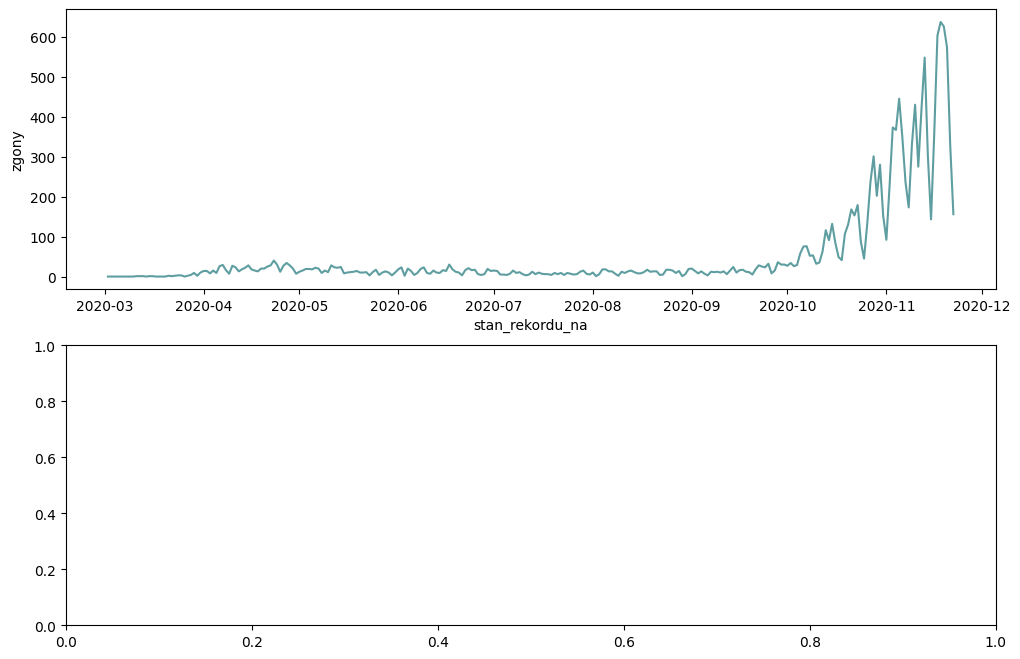

In [90]:
fig, axs = plt.subplot_mosaic("""
A
B
""")
sns.lineplot(data = dane_archiwalne, x = 'stan_rekordu_na', y = 'zgony', ax = axs['A'])
sns.lineplot(data = dane_archiwalne.rolling(window = 7,min_periods = 1).mean(), \
        x = 'stan_rekordu_na', \
        y = 'zgony', ax = axs['B'])
plt.show()